### Import Statements

Below is boilerplate code for import statements and a basic configuration for ignoring GELSD warnings

`%matplotlib inline` enables Jupyter Notebooks to display matplotlib plots inline

In [36]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Dataset Load

The Boston housing dataset is loaded from the stock sklearn dataset database.

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [13]:
boston.data.shape

(506, 13)

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Convert the Boston Dataset into a Dataframe

The Boston dataset, which is a dictionary, can be easily converted into a Pandas DataFrame. We use the `.head()` method to visualize the first 5 values in the df.

In [20]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
 boston.target[:5]
df["PRICE"] = boston.target

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### LinearRegression Import Statements

We use the `fit` function to train the model to understand patterns in the **X** dataframe against the `df["PRICE"]` target variable set.

In [30]:
from sklearn.linear_model import LinearRegression

X = df.drop("PRICE", axis=1)

In [32]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [103]:
linear_model = LinearRegression()
linear_model.fit(X, df["PRICE"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [105]:
len(linear_model.coef_)

13

### Visualize the Estimated Coefficients against the Dataset columns

We can easily plot it in a DataFrame using the `zip` function of Python. Here we zip `linear_model.coef_` against the column names of **X**.

In [106]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Plotting and Visualization

I'm using the matplotlib style *fivethirtyeight* as a theme for my notebooks. A scatter plot with `df["RM"]` as the independent variable and the `df["PRICE"]` column as the dependent variable.

Text(0.5,1,'Relationship between Room Count Price')

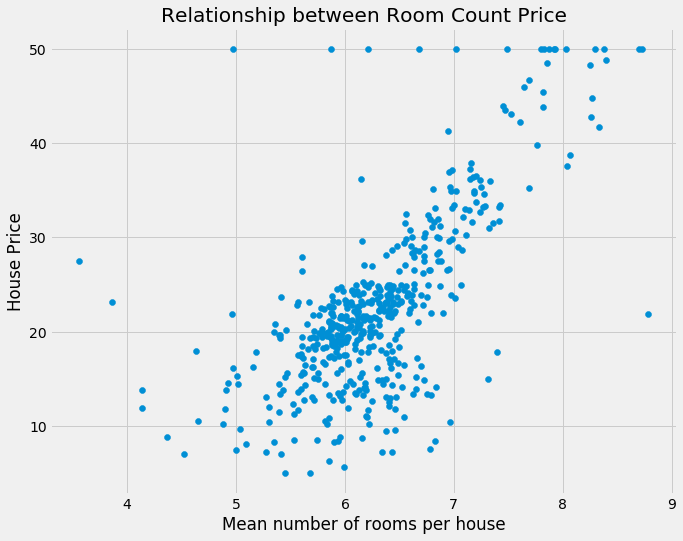

In [107]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["RM"], df["PRICE"])
plt.xlabel("Mean number of rooms per house")
plt.ylabel("House Price")
plt.title("Relationship between Room Count Price")

In [108]:
predictions = linear_model.predict(X)

In [109]:
df["PRED"] = predictions

In [110]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.008213
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.029861
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.570232
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.608141
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.942882


### Plotting and Visualization revisited

Here we compare the predicted prices against the actual prices to see if there is a linear correlation between the two variables. 

Text(0.5,1,'Price vs Predicted Price')

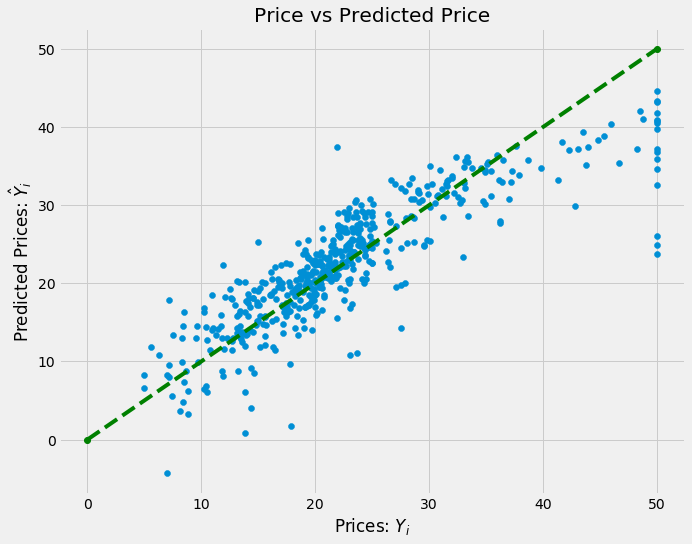

In [117]:
plt.figure(figsize=(10,8))


plt.scatter(df["PRICE"], linear_model.predict(X))
plt.plot([0, 50], [0, 50], '--go')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Price vs Predicted Price")

In [3]:
mean_squared_error = np.mean((df["PRICE"] - linear_model.predict(X))**2)
mean_squared_error

NameError: name 'df' is not defined

In [85]:
linear_model.score(X, df["PRICE"])

0.7406077428649427